# Higgs Boson Challenge:
- `Dataset Link:` https://www.kaggle.com/competitions/higgs-boson/overview
- `Dataset Description:` https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf
- `Orignal Code(Developed on Kaggle):` https://www.kaggle.com/code/swarnava007/higgs-bosson-ml
- `GitHub Link:` https://github.com/Iam-007Swarna/Higgs_boson_ml/blob/main/higgs-bosson-ml.ipynb
- `Presentation Link:` GitHub
- `PPT:` GitHub
- `Poster:` GitHub

# Data Description:
- The Higgs Boson particle was discovered in 2013. A key property of any particle is how often it decays into other particles. ATLAS is a particle physics experiment taking place at the Large Hadron Collider at CERN that searches for new particles and processes using head-on collisions of protons of extraordinarily high energy. The ATLAS experiment has recently observed a signal of the Higgs boson decaying into two tau particles, but this decay is a small signal buried in background noise. 

<!-- ![ATLAS](https://cds.cern.ch/images/ATLAS-PHOTO-2018-022-1/file?size=large) -->
![ATLAS](https://cds.cern.ch/images/CERN-HOMEWEB-PHO-2020-046-1/file?size=large)

# Importing Nessesary Libraries:

In [89]:
# Mathematical functions
import math

# Data manipulation
import numpy as np
import pandas as pd

# Plotting and visualization
import matplotlib.pyplot as plt
%matplotlib inline

#Statistical libraries
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_auc_score,roc_curve, r2_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
# from helper import plot_permute_importance, plot_feature_importance
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

import seaborn as sns
sns.set_theme()
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Helper function to plot the impurity-based feature importances of the defined model
def plot_feature_importance(model1, model2,X,y):
    
    plt.xkcd(scale=0.3,randomness=0.6)
#     maxlim = max(max(model1.feature_importances_),max(model2.feature_importances_))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Plot for Random Forest
    tree_importance_sorted_idx = np.argsort(model1.feature_importances_)
    tree_indices = np.arange(0, len(model1.feature_importances_)) + 0.5

    ax1.barh(tree_indices, 
           model1.feature_importances_[tree_importance_sorted_idx], 
           height=0.7, color='#B2D7D0')
    ax1.set_yticks(tree_indices)
    ax1.set_yticklabels(X.columns[tree_importance_sorted_idx], 
                        fontsize=12)
    ax1.set_ylim((0, len(model1.feature_importances_)))
#     ax1.set_xlim((0, maxlim+0.01))
    ax1.set_xlabel("Impurity Based Feature Importance", fontsize=16)
    
    #ax1.set_ylabel("Predictors", fontsize=16)

    # Plot for Bagging

    tree_importance_sorted_idx = np.argsort(model2.feature_importances_)
    tree_indices = np.arange(0, len(model2.feature_importances_)) + 0.5
    difference = model2.feature_importances_ - model1.feature_importances_
    difference = difference[tree_importance_sorted_idx]
    

    ax2.barh(tree_indices, model2.feature_importances_[tree_importance_sorted_idx], 
          height=0.7, color='#EFAEA4')
    for index, value in enumerate(model2.feature_importances_[tree_importance_sorted_idx]):
        ax2.text(value, index+0.3, f" {str(round(difference[index],3))}",fontsize=14)

    ax2.set_yticks(tree_indices)
    ax2.set_yticklabels(X.columns[tree_importance_sorted_idx], fontsize=12)
    
    ax2.set_ylim((0, len(model2.feature_importances_)))
    maxlim = max(model2.feature_importances_)
    ax2.set_xlim(0,maxlim+0.02)
    ax2.set_xlabel("Impurity Based Feature Importance", fontsize=16)

    ax1.set_title("Decision Tree", fontsize=18)
    ax2.set_title("Random Forest", fontsize=18)
    fig.tight_layout()
    plt.show()
    
    
# Helper function to plot the feature importance for the defined model
def plot_permute_importance(result1, result2,X,y):
#     maxlim = max(max(result1.importances_mean),max(result2.importances_mean))
    plt.xkcd(scale=0.3,randomness=0.6)
    # Plot for random forest
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    tree_importance_sorted_idx = np.argsort(result1.importances_mean)
    tree_indices = np.arange(0, len(result1.importances_mean)) +0.5

    ax1.barh(tree_indices, result1.importances_mean[tree_importance_sorted_idx], 
              height=0.7, color='#B2D7D0')
    ax1.set_yticks(tree_indices)
    ax1.set_yticklabels(X.columns[tree_importance_sorted_idx], fontsize=12)
    ax1.set_ylim((0, len(result1.importances_mean)))
    ax1.set_xlabel("Permutation Feature Importance", fontsize=16)

    #ax1.set_ylabel("Predictors", fontsize=16)

  # Plot for Bagging

    tree_importance_sorted_idx2 = np.argsort(result2.importances_mean)
    tree_indices2 = np.arange(0, len(result2.importances_mean)) +0.5
    difference = result2['importances_mean'] - result1['importances_mean']
    difference = difference[tree_importance_sorted_idx]

    ax2.barh(tree_indices2, result2.importances_mean[tree_importance_sorted_idx2], 
              height=0.7, color='#EFAEA4')
    for index, value in enumerate(result2.importances_mean[tree_importance_sorted_idx2]):
        ax2.text(value, index+0.3, f" {str(round(difference[index],3))}",fontsize=14)

    ax2.set_yticks(tree_indices2)
    ax2.set_yticklabels(X.columns[tree_importance_sorted_idx2], fontsize=12)
    ax2.set_ylim((0, len(result2.importances_mean)))
    ax2.set_xlabel("Permutation Feature Importance", fontsize=16)
    maxlim = max(result2.importances_mean)
    ax2.set_xlim(0,maxlim+0.015)
    ax1.set_title("Decision Tree", fontsize=18)
    ax2.set_title("Random Forest", fontsize=18)
    fig.tight_layout()
    plt.show()

# Data Understanding:

In [162]:
# getting train path
train_path = '../input/higgs-boson/training.zip'
#getting the test path
test_path = '../input/higgs-boson/test.zip'
pd.set_option('display.max_columns',None) # viewing all columns

In [163]:
train_df = pd.read_csv(train_path) #reading the train dataset
print('Train dataset shape: ',train_df.shape) 
train_df.head()

Train dataset shape:  (250000, 33)


,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [164]:
test_df = pd.read_csv(test_path) #reading the test dataset
print('Test dataset shape: ',test_df.shape)
test_df.head()

Test dataset shape:  (550000, 31)


,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,350000,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,3.036,56.018,1.536,-1.404,-999.000,22.088,-0.540,-0.609,33.930,-0.504,-1.511,48.509,2.022,98.556,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
1,350001,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,2.679,132.865,1.777,-1.204,-999.000,30.716,-1.784,3.054,54.574,-0.169,1.795,21.093,-1.138,176.251,1,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575
2,350002,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,4.137,97.600,1.096,-1.408,-999.000,46.564,-0.298,3.079,51.036,-0.548,0.336,19.461,-1.868,111.505,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
3,350003,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,9.104,94.112,0.819,-1.382,-999.000,51.741,0.388,-1.408,42.371,-0.295,2.148,25.131,1.172,164.707,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,350004,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,721.552,1.713,-0.913,0.004,45.087,-1.548,1.877,77.252,-1.913,2.838,22.200,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213


In [93]:
train_df.describe() #viewing statistics of the train dataset

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,158.432217,1.437609,-0.128305,-708.985189,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,115.706115,0.844743,1.193585,453.596721,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,-999.000000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,0.883000,-1.371000,-999.000000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,1.280000,-0.356000,-999.000000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,1.777000,1.225000,0.000000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,19.773000,1.414000,1.000000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [94]:
missing_col = [col for col in train_df.columns if col not in test_df.columns] #finding the missing cols in the test data 
print('Columns those are not present in test dataset are:',missing_col)

Columns those are not present in test dataset are: ['Weight', 'Label']


In [95]:
train_df.info() #train datatype summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

- train dataset doesnot contain any null value
- datatype: 1 object, 2 integer and 30 float type

In [96]:
test_df.info() #test data type summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550000 entries, 0 to 549999
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      550000 non-null  int64  
 1   DER_mass_MMC                 550000 non-null  float64
 2   DER_mass_transverse_met_lep  550000 non-null  float64
 3   DER_mass_vis                 550000 non-null  float64
 4   DER_pt_h                     550000 non-null  float64
 5   DER_deltaeta_jet_jet         550000 non-null  float64
 6   DER_mass_jet_jet             550000 non-null  float64
 7   DER_prodeta_jet_jet          550000 non-null  float64
 8   DER_deltar_tau_lep           550000 non-null  float64
 9   DER_pt_tot                   550000 non-null  float64
 10  DER_sum_pt                   550000 non-null  float64
 11  DER_pt_ratio_lep_tau         550000 non-null  float64
 12  DER_met_phi_centrality       550000 non-null  float64
 13 

- test data also doesnot contain any null values
- datatype: 2 integer and 29 float type

In [165]:
#eventId is irrelevent so we can drop the column
# weight also not present in test dataset so we can drop that too
# Prefix-less variables EventId, Weight and Label have a special role and should not be
# used as input to the classifier.
train_df.drop(['EventId','Weight'],axis=1, inplace=True)
test_df.drop(['EventId'],axis=1, inplace=True)

In [166]:
print('Train shape: ',train_df.shape) 
print('Test shape: ',test_df.shape)

Train shape:  (250000, 31)
Test shape:  (550000, 30)


# EDA(Exploratory Data Analysis):

In [99]:
# for label contains 's' for Signal events and 'b' for Background events
# we can seperate datasets for signal and background events and perform EDA based on top of that
train_s_df = train_df[train_df['Label']=='s'] # signal event dataframe
train_b_df = train_df[train_df['Label']=='b'] # background event dataframe

Signal event dataframe shape:  (85667, 31)
Background event dataframe shape:  (164333, 31)


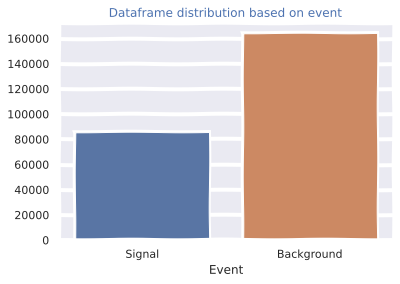

In [100]:
#distribution of signal and background event dataframes
print('Signal event dataframe shape: ',train_s_df.shape)
print('Background event dataframe shape: ',train_b_df.shape)

sns.barplot(x=['Signal','Background'], y=[85667,164333])
plt.xlabel('Event')
plt.title('Dataframe distribution based on event', color='b')

plt.show()

**Observation:**
- Signal events and Background events are nearly **1:3 ratio**

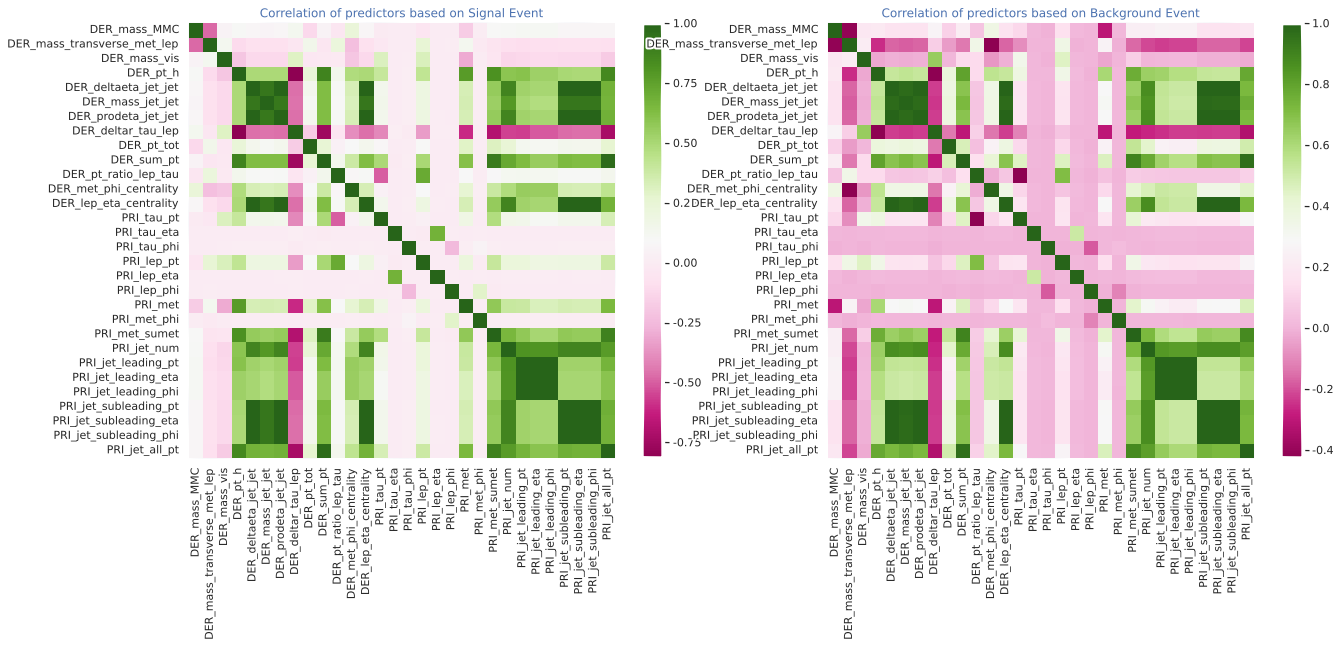

In [101]:
plt.figure(figsize=(21,8))
plt.subplot(1,2,1)
sns.heatmap(train_s_df.corr(),cmap="PiYG") # signal event correlations
plt.title('Correlation of predictors based on Signal Event',color='b')

plt.subplot(1,2,2)
sns.heatmap(train_b_df.corr(),cmap="PiYG") #background event correlations
plt.title('Correlation of predictors based on Background Event',color='b')
plt.show()

## Data Cleaning/Preprocessing:
1. Variables are indicated as `“may be undefined”` when it can happen that they are meaning less or cannot be computed; in this case, their value is `−999.0`, which is outside the normal range of all variables.
2. The `mass` of particles `has not been provided`, as it can safely be `neglected` for the Challenge.
3. The variables prefixed with `PRI (for PRImitives)` are “raw” quantities about the bunch collision as measured by the detector, essentially the momenta of particles.
4. Variables prefixed with `DER (for DERived)` are quantities computed from the primitive features.

In [102]:
#defining function for finding data with outlier values(-999.0)
def Outlier(dataset):
    index = [col for col in dataset.columns if -999.0 in dataset[col].value_counts().index] #index of the columns that contains -999.0
    data = [dataset[col].value_counts()[-999.0]/len(dataset)*100 for col in index] #column values percentage
    return pd.Series(index = index, data = data).sort_values(ascending = False)

In [103]:
#finding percentage of the data samples containing -999.0 as value in train and test dataframe
#creating an outlier dataframe
Outlier_df = pd.DataFrame()
Outlier_df['Training set (Background)'] = Outlier(train_b_df).values
Outlier_df['Training set (Signal)'] = Outlier(train_s_df).values
Outlier_df['Training set (All events)'] = Outlier(train_df).values
Outlier_df['Test set (All events)'] = Outlier(test_df).values
Outlier_df.set_index(Outlier(train_df).index, inplace = True)
Outlier_df.style.set_caption("Percentage % of Outlier in the Dataset columns")

,Training set (Background),Training set (Signal),Training set (All events),Test set (All events)
DER_deltaeta_jet_jet,75.611715,62.103260,70.982800,70.885818
DER_mass_jet_jet,75.611715,62.103260,70.982800,70.885818
DER_prodeta_jet_jet,75.611715,62.103260,70.982800,70.885818
DER_lep_eta_centrality,75.611715,62.103260,70.982800,70.885818
PRI_jet_subleading_pt,75.611715,62.103260,70.982800,70.885818
PRI_jet_subleading_eta,75.611715,62.103260,70.982800,70.885818
PRI_jet_subleading_phi,75.611715,62.103260,70.982800,70.885818
PRI_jet_leading_pt,45.286704,29.757083,39.965200,40.028364
PRI_jet_leading_eta,45.286704,29.757083,39.965200,40.028364
PRI_jet_leading_phi,45.286704,29.757083,39.965200,40.028364


**Observation:**
- we are going to drop the columns which contains more than **60%** outliers(ie. `-999.0` values)

In [104]:
#columns with high missing values
drop_columns=['DER_deltaeta_jet_jet','DER_mass_jet_jet','DER_prodeta_jet_jet','DER_lep_eta_centrality','PRI_jet_subleading_pt','PRI_jet_subleading_eta','PRI_jet_subleading_phi']

# sns.heatmap(train_df[drop_columns].corr().abs())

In [105]:
# as the outliers are "Undefined" ie. -999.0 we will replace them with np.nan values for better analysis
for col in drop_columns:
    train_df[col]=train_df[col].replace(-999.0,np.nan)
for col in drop_columns:
    train_s_df[col]=train_s_df[col].replace(-999.0,np.nan)
    train_b_df[col]=train_b_df[col].replace(-999.0,np.nan)
    

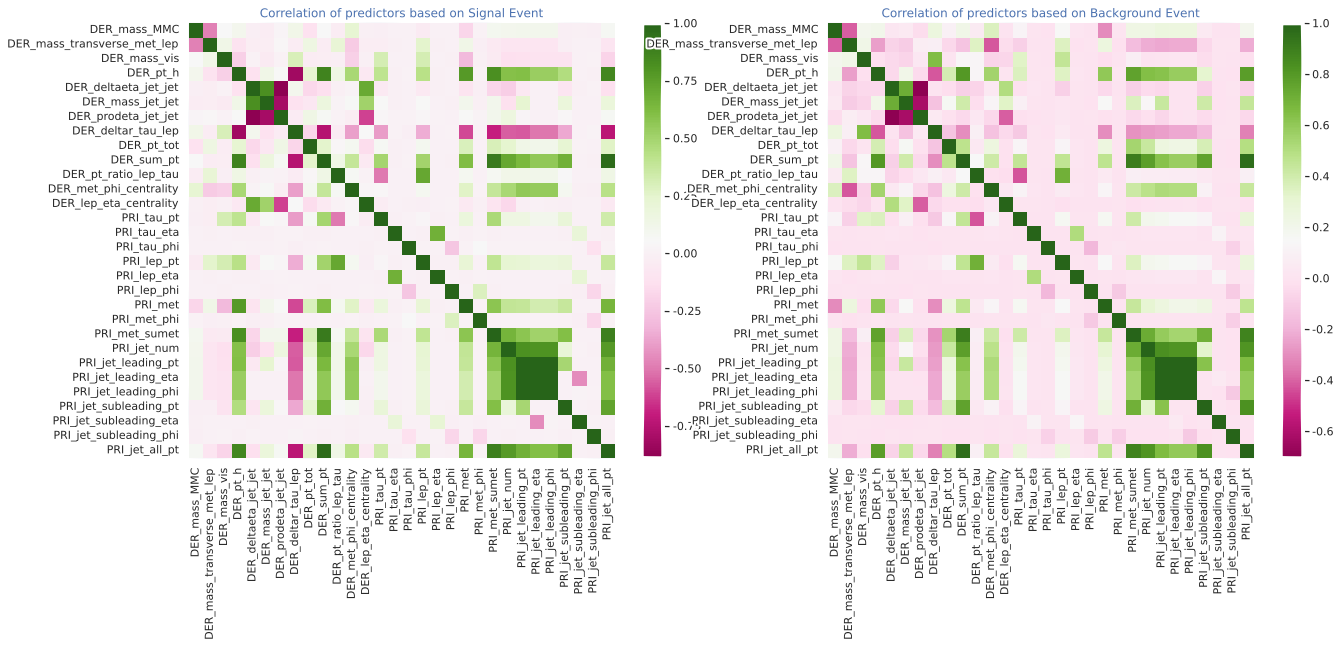

In [106]:
plt.figure(figsize=(21,8))
plt.subplot(1,2,1)
sns.heatmap(train_s_df.corr(),cmap="PiYG")
plt.title('Correlation of predictors based on Signal Event',color='b') #signal event dataframe after replacement

plt.subplot(1,2,2)
sns.heatmap(train_b_df.corr(),cmap="PiYG") #background event dataframe after replacement
plt.title('Correlation of predictors based on Background Event',color='b')
plt.show()

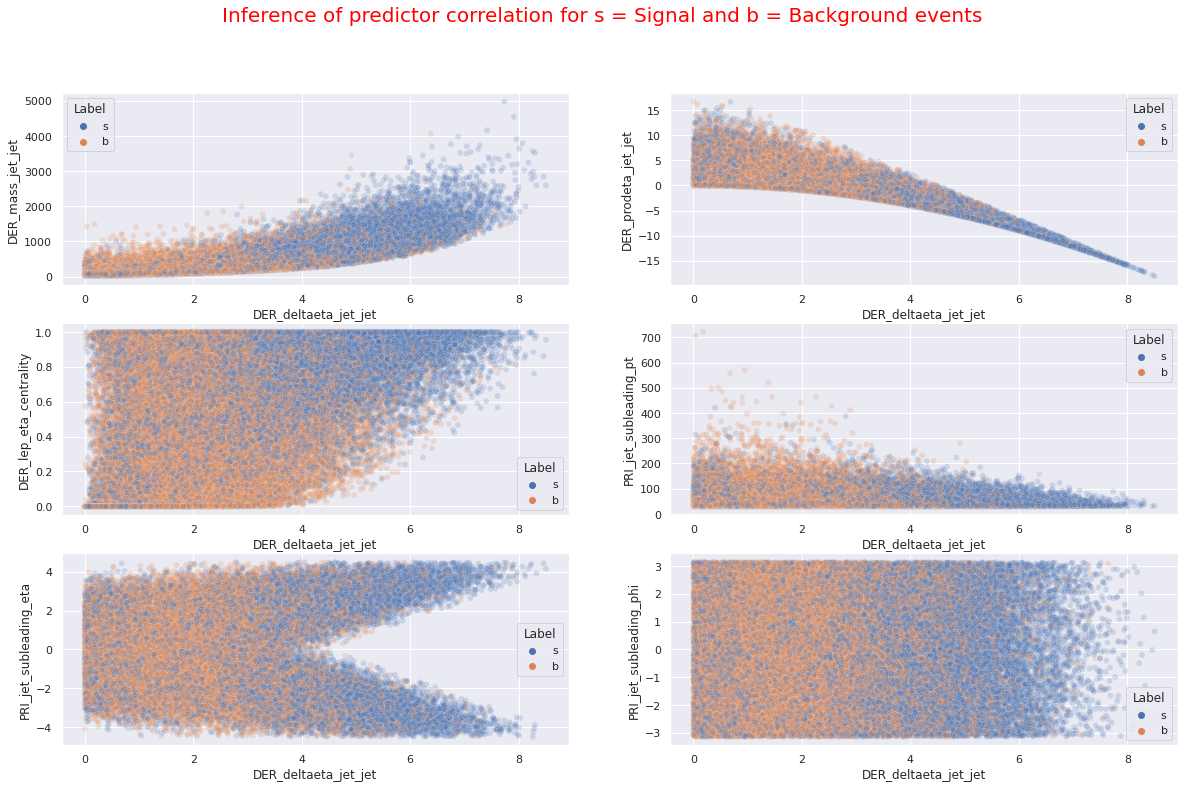

In [21]:
# Inference of predictor correlation for s = Signal and b = Background events
plt.figure(figsize=(20,12))
for idx, col in enumerate(drop_columns[1:]):
    plt.subplot(3,2,idx+1)
    sns.scatterplot(x= train_df.DER_deltaeta_jet_jet,y=train_df[col], hue=train_df.Label, alpha=0.2) 
    plt.xlabel(drop_columns[0]) #xlabel
    plt.ylabel(col) #ylabel
plt.suptitle('Inference of predictor correlation for s = Signal and b = Background events', size=20,color='red')
plt.show()


Collinearity among Predictors in Train dataset after replacing Outliers by NAN values 



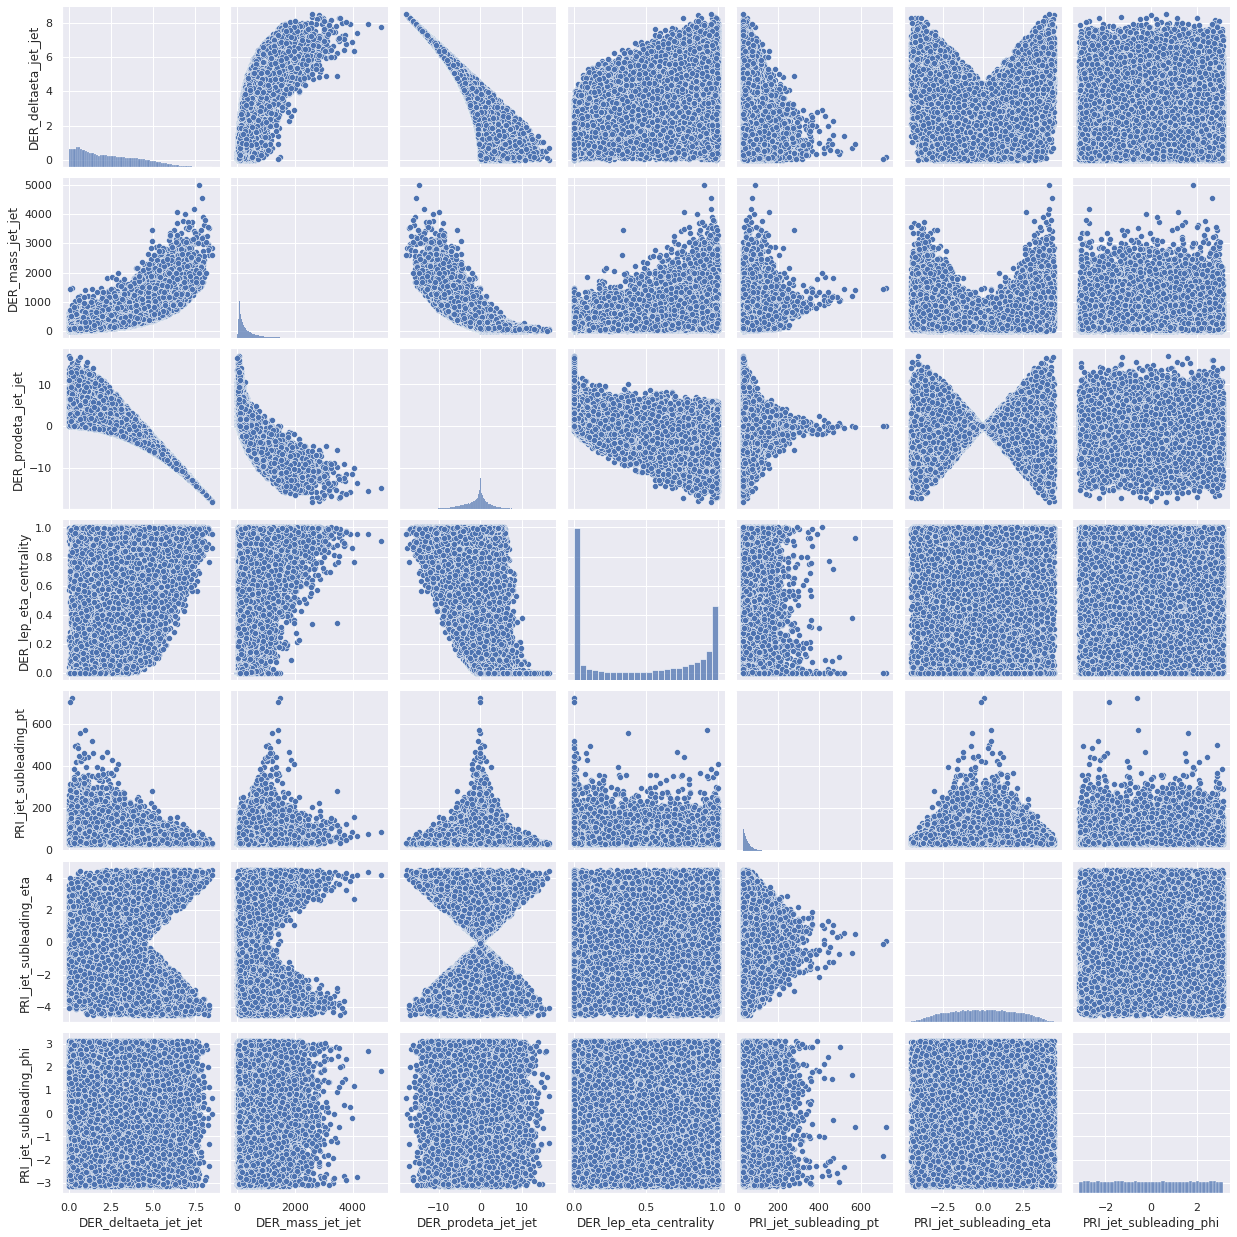

In [22]:
#pair plot between the correlated predeictors for whole dataset
#as we are going drop these columns, lets check their collinearity in train dataset
print('Collinearity among Predictors in Train dataset after replacing Outliers by NAN values \n')

sns.pairplot(data=train_df[drop_columns]) #pair wise scatter plot inference
plt.show()

In [23]:
#drop the columns with high outliers and high correlation
train_df = train_df.drop(drop_columns,axis=1)
train_df.shape

(250000, 24)

### Assigning label as `Signal event(s)`--> '1' and `Background event(b)`--> '0'
- **s** -----> `Signal event`
- **b** -----> `Backround event`

In [24]:
#Encoding the Target variable 'Label' to Binary classification problem
train_df['Label'] = train_df['Label'].replace({'s':1,'b':0}) 
train_df.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_all_pt,Label
0,138.470,51.655,97.827,27.980,3.064,41.928,197.760,1.582,1.396,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,113.497,1
1,160.937,68.768,103.235,48.146,3.473,2.078,125.157,0.879,1.414,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,46.226,0
2,-999.000,162.172,125.953,35.635,3.148,9.336,197.814,3.776,1.414,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,44.251,0
3,143.905,81.417,80.943,0.414,3.310,0.414,75.968,2.354,-1.285,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-0.000,0
4,175.864,16.915,134.805,16.405,3.891,16.405,57.983,1.056,-1.385,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,0.000,0


# Train/Validation Dataset Creation(For LABEL):


## Assigning Predictor and Response variables X and y:

In [25]:
X = train_df.drop(['Label'],axis=1) #predictor variables
y = train_df['Label'] #response variables

In [26]:
print('Predictor shape',X.shape) 
print('Response shape',y.shape)


Predictor shape (250000, 23)
Response shape (250000,)


## Standardization:
- Using `StandardScaler`

In [27]:
#standerdization of predictors
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

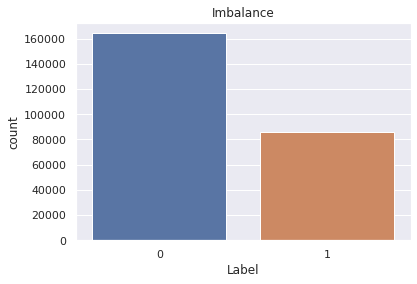

Imbalance Percentage% :
 0    65.7332
1    34.2668
Name: Label, dtype: float64


In [28]:
# viewing Imbalace in dataset
sns.countplot(x="Label", data=train_df)
plt.title('Imbalance')
plt.show()
print('Imbalance Percentage% :\n',train_df.Label.value_counts(normalize=True)*100)

**Observation:**
- The dataset is `Imbalanced` over label

## Imbalance treatment:
- we choose `upscaling(SMOTE)` as a method as the dataset is sufficiently large

In [29]:
#Upscaling the data
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


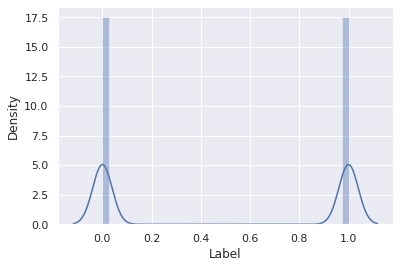

Data samples after SMOTE:  1    164333
0    164333
Name: Label, dtype: int64


In [30]:
#distribution of both classes after upscaling
sns.distplot(y_res)
plt.show()
print('Data samples after SMOTE: ',y_res.value_counts())

**Observation:**
- Now this dataset is `balanced.`

## Train/Validation split:

In [31]:
#splitting the data set into train/validation set(80-20%) with random state=42
#so we set random state = 42 for easier inference of model comparison
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, train_size=0.8,random_state=42)

# Model Building:

## 1. Baseline Model(Logistic regression):

In [32]:
#building custom evaluation function
def evaluate(y_true,y_pred):
    confusion = confusion_matrix(y_true, y_pred ) #confusion matrix
    print(confusion) 
    sns.heatmap(confusion/np.sum(confusion), annot=True, 
            fmt='.2%', cmap='Blues') #heatmap of confusion matrix
    plt.show()
    print(f'Accuracy on data : {accuracy_score(y_true, y_pred)*100:.2f}%')
    print(f'F1 Score on data : {f1_score(y_true, y_pred):.2f}')
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    print('Sensitivity/Recall/TPR',round(TP / float(TP+FN),2))
    print('FPR',round(FP/ float(TN+FP),2))
    print('Precision',round(TP / float(TP+FP),2))
    print('Specificity/TNR',round(TN / float(TN+ FP),2))

In [33]:
#logistic regression as baseline model
logreg = LogisticRegression()#creating model instance
logreg.fit(X_train, y_train) #training the baseline model

LogisticRegression()

[[ 92229  39396]
 [ 28536 102771]]


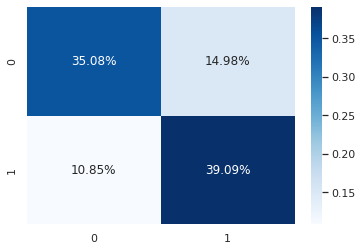

Accuracy on data : 74.16%
F1 Score on data : 0.75
Sensitivity/Recall/TPR 0.78
FPR 0.3
Precision 0.72
Specificity/TNR 0.7


In [34]:
#Prediction on train data

y_train_pred = logreg.predict(X_train)
evaluate(y_train, y_train_pred)

[[22847  9861]
 [ 7249 25777]]


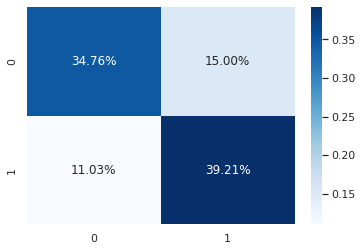

Accuracy on data : 73.97%
F1 Score on data : 0.75
Sensitivity/Recall/TPR 0.78
FPR 0.3
Precision 0.72
Specificity/TNR 0.7


In [35]:
#Prediction on validation data

y_val_pred = logreg.predict(X_val)
evaluate(y_val, y_val_pred)

In [36]:
# defining ROC function
def ROC( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FP Rate or [1 - TN Rate]',color='blue')
    plt.ylabel('TP Rate',color='blue')
    plt.title('ROC Curve',color='r')
    plt.legend(loc="best")
    plt.show()

    return None

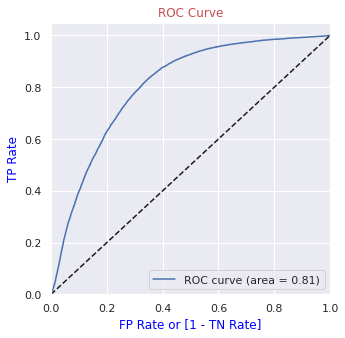

In [37]:
#ROC AUC plot for baseline logistic reg model
y_proba = logreg.predict_proba(X_val)[:,1]
ROC(y_val, y_proba)

**Observation:**
- `ROC(AUC)` is **0.81.** for Logistic Regression

## 2.1 Decision Tree Classifier Model

In [38]:
dtree = DecisionTreeClassifier(max_depth =11, random_state=42)
dtree.fit(X_train, y_train)
y_train_pred = dtree.predict(X_train)
y_val_pred = dtree.predict(X_val)

[[107978  23647]
 [ 18873 112434]]


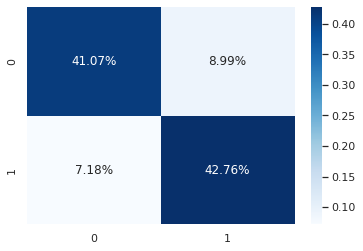

Accuracy on data : 83.83%
F1 Score on data : 0.84
Sensitivity/Recall/TPR 0.86
FPR 0.18
Precision 0.83
Specificity/TNR 0.82


In [39]:
#evaluate on train data
evaluate(y_train,y_train_pred)

[[26033  6675]
 [ 5396 27630]]


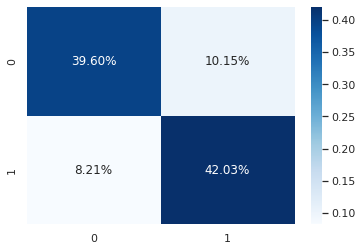

Accuracy on data : 81.64%
F1 Score on data : 0.82
Sensitivity/Recall/TPR 0.84
FPR 0.2
Precision 0.81
Specificity/TNR 0.8


In [40]:
#evaluate on validation data
evaluate(y_val, y_val_pred)

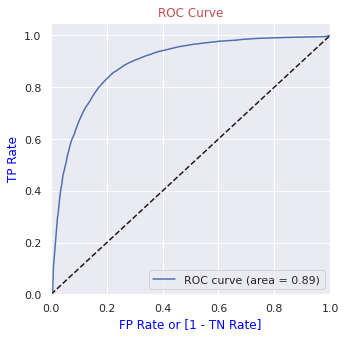

In [41]:
y_proba = dtree.predict_proba(X_val)[:,1] #prediction probability
ROC(y_val, y_proba) #ROC_AUC curve

**Observation:**
- `ROC(AUC)` is **0.89.** for Decision Tree.

### 2.2 Hyperparameter tuning for Decision Tree Classifier:
- "max_depth": [5, 11, 13, 15],
- 'min_samples_split':  [5, 10, 20, 50, 100, 250],
- "min_samples_leaf" : [1, 5, 10, 25, 50, 100]

In [42]:
dt = DecisionTreeClassifier(random_state=42)

# parameters
params = {
    "max_depth": [5, 11, 13, 15],
    'min_samples_split':  [5, 10, 20, 50, 100, 250],
    "min_samples_leaf" : [1, 5, 10, 25, 50, 100]
}
#performing cross validation with 4 folds
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="f1")

# Performing gridsearch
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 144 candidates, totalling 576 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 11, 13, 15],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 100],
                         'min_samples_split': [5, 10, 20, 50, 100, 250]},
             scoring='f1', verbose=1)

In [43]:
#best f1 score
grid_search.best_score_

0.8191175719778185

In [44]:
#best params
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=11, min_samples_split=5, random_state=42)

In [45]:
#permutation importance
tree_result = permutation_importance(dt_best,X_train,y_train,random_state=42)

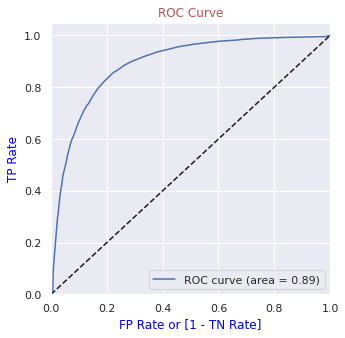

In [46]:
y_proba = dt_best.predict_proba(X_val)[:,1] #prediction probability
ROC(y_val, y_proba) #ROC_AUC plot

**Observation:**
- `ROC(AUC)` is **0.89.** for Decision Tree after Hyperparameter tuning

## 3. Ensamble Model (Random Forest Classifier):

### 3.1 Hyperparameter tuning for Random Forest CLassifier:
- "max_depth": [5, 11, 13, 15],
- "min_samples_leaf": [5, 10, 20, 30],
- 'n_estimators': [25, 30, 50]

In [47]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# parameters
params = {
    "max_depth": [5, 11, 13, 15],
    "min_samples_leaf": [5, 10, 20, 30],
    'n_estimators': [25, 30, 50]
}
#performing cross validation with 4 folds
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="f1")

grid_search.fit(X_train, y_train) #training the model

Fitting 4 folds for each of 48 candidates, totalling 192 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 11, 13, 15],
                         'min_samples_leaf': [5, 10, 20, 30],
                         'n_estimators': [25, 30, 50]},
             scoring='f1', verbose=1)

In [48]:
#cross validation result
print(grid_search.best_score_) #best f1 score
rf_best = grid_search.best_estimator_ #best params
rf_best

0.8380769299289582


RandomForestClassifier(max_depth=15, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [49]:
#permutation importance
forest_result = permutation_importance(rf_best,X_train,y_train,random_state=42)

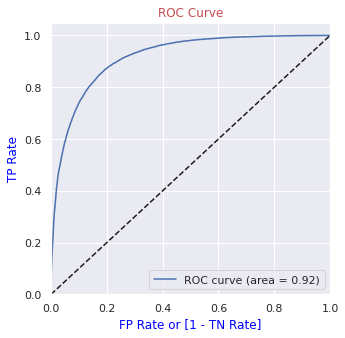

In [50]:
y_proba = rf_best.predict_proba(X_val)[:,1] #prediction probability
ROC(y_val, y_proba) #ROC_AUC curve

**Observation:**
- `ROC(AUC)` is **0.92.** for Random Forest with Hyperparameter tuning

### Feature Importance:

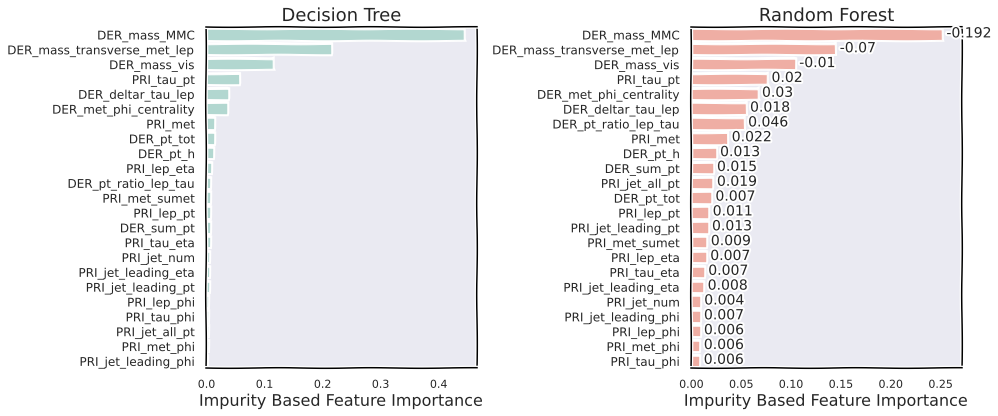

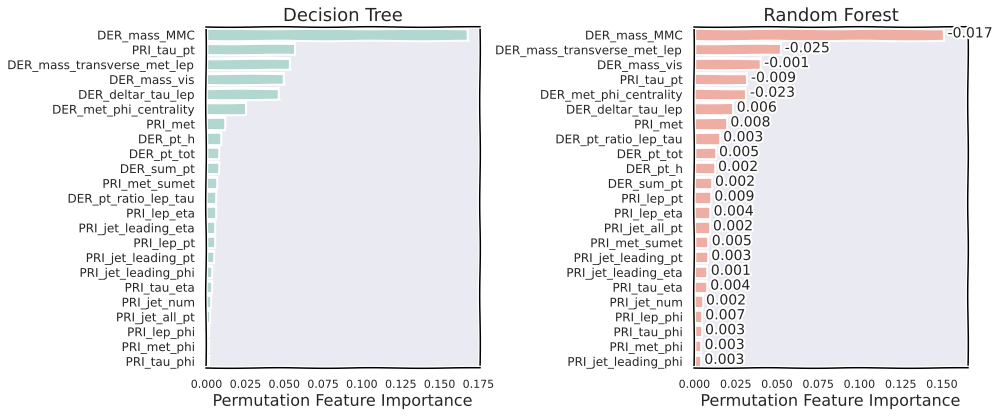

In [51]:
# visualize the feature importance using 'MDI'
plot_feature_importance(dt_best,rf_best,X_train,y_train)

# visualize the feature importance using 'permutation feature importance'
plot_permute_importance(tree_result,forest_result,X_train,y_train)

**Observation:**
- There are lots of unimportant features can be observed, that can be tuned for getting better model.

## 4. AdaBoost Classifier Model:

In [52]:
# shallow tree as weak learner
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)

# Fit the shallow decision tree 
shallow_tree.fit(X_train, y_train)

# Test error
y_pred = shallow_tree.predict(X_val) 
score = f1_score(y_val, y_pred) #f1 score as metrics
score

0.7582358786211113

In [53]:
# Adaboost with shallow tree as base estimator

# number of trees to be used or estimators
estimators = list(range(1, 150, 10))

# Loop through the estimators
adaboost_scores = []
for num_est in estimators:
    adaboost = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators = num_est, random_state=42)
    
    adaboost.fit(X_train, y_train)
    y_pred = adaboost.predict(X_val)
    score = f1_score(y_val, y_pred) #f1 score as metrics
    adaboost_scores.append(score)

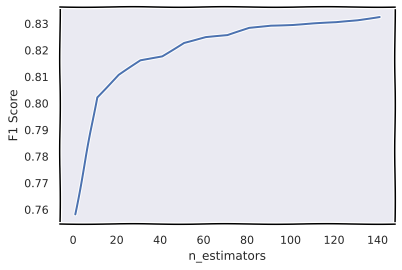

In [54]:
# Plot of scores corrosponding to number of estimators to find the best possible number of estimator
plt.plot(estimators, adaboost_scores)
plt.xlabel('n_estimators')
plt.ylabel('F1 Score')
plt.show()

**Observation:**
- We can see from the graph that after **n_estimators = 100** the F1 score nearly `plateaus.`
- We choose 100 as our no of trees for the model.

[[26802  5906]
 [ 5456 27570]]


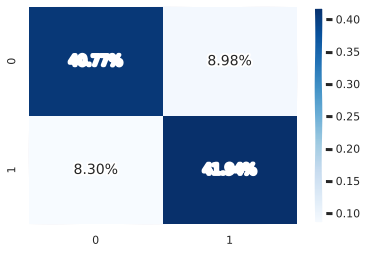

Accuracy on data : 82.72%
F1 Score on data : 0.83
Sensitivity/Recall/TPR 0.83
FPR 0.18
Precision 0.82
Specificity/TNR 0.82


In [55]:
adaboost_best = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators = 100, random_state=42)
adaboost_best.fit(X_train, y_train) #training the model
y_pred = adaboost_best.predict(X_val) #predictions
evaluate(y_val, y_pred) #confusion matrix

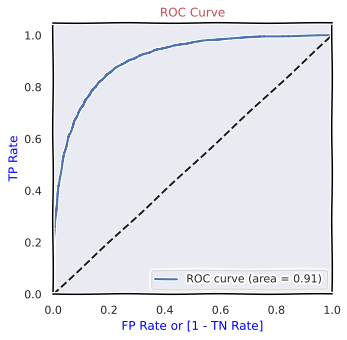

In [56]:
y_proba = adaboost_best.predict_proba(X_val)[:,1] #prediction probability
ROC(y_val, y_proba) #ROC_AUC curve

**Observation:**
- `ROC(AUC)` is **0.91.** for ADABoost with Hyperparameter tuning
- which is nearly same for hyperparameter tuned random forest model.
- **Considering computational cost of ADABoost we are goig to choose `Random Forest model` to be our `best model` with ROC(AUC) = `0.92`.**

# Train/Validation Dataset Creation(For WEIGHT):

# Data Preprocessing:

In [57]:
#reading the dataset
train_df = pd.read_csv(train_path)
train_df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [58]:
#preprocessing the data
#columns with high missing values
drop_columns=['DER_deltaeta_jet_jet','DER_mass_jet_jet','DER_prodeta_jet_jet','DER_lep_eta_centrality','PRI_jet_subleading_pt','PRI_jet_subleading_eta','PRI_jet_subleading_phi']

# sns.heatmap(train_df[drop_columns].corr().abs())
train_df.drop(['EventId'],axis=1, inplace=True)
#drop the columns with high outliers and high correlation
train_df = train_df.drop(drop_columns,axis=1)
train_df.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_all_pt,Weight,Label
0,138.470,51.655,97.827,27.980,3.064,41.928,197.760,1.582,1.396,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,113.497,0.002653,s
1,160.937,68.768,103.235,48.146,3.473,2.078,125.157,0.879,1.414,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,46.226,2.233584,b
2,-999.000,162.172,125.953,35.635,3.148,9.336,197.814,3.776,1.414,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,44.251,2.347389,b
3,143.905,81.417,80.943,0.414,3.310,0.414,75.968,2.354,-1.285,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-0.000,5.446378,b
4,175.864,16.915,134.805,16.405,3.891,16.405,57.983,1.056,-1.385,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,0.000,6.245333,b


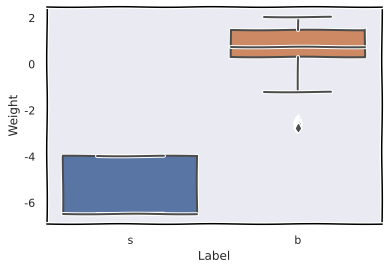

In [59]:
#viewing boxplot for inferencing the relation between signal/background event and their weights
sns.boxplot(data=train_df, x='Label', y=np.log(train_df["Weight"]))
plt.show()

**Observation:**
- we will remove "Weight" from the train dataset as the test data does not contain "weight" and 'Label'
- if we dont derop then the errors will be compounded

## X (Predictor variable) & y(Response variable): 

In [60]:
X = train_df.drop(['Weight','Label'], axis=1) #dropping 'weight' and 'label' rest is predictor variable for our model
y = train_df['Weight'] #response variable

In [61]:
print('Predictor shape',X.shape) 
print('Response shape',y.shape)

Predictor shape (250000, 23)
Response shape (250000,)


## Standerdization:

In [62]:
#standerdization of predictors
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

## Train/Validation split(80-20%):

In [63]:
#splitting the data set into (80-20%) with random state=42
#so we set random state = 42 for easier inference of model comparison
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8,stratify=train_df['Label'],random_state=42)

# Model Building:

## 1. Baseline model(Linear Regression):

In [64]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_train_pred = linreg.predict(X_train)
y_val_pred = linreg.predict(X_val)
print(f'MSE on Train data : {mean_squared_error(y_train, y_train_pred):.4f}')
print(f'MSE on validation data : {mean_squared_error(y_val, y_val_pred):.4f}')
print(f'r2_score on Train data : {r2_score(y_train, y_train_pred):.4f}')

MSE on Train data : 1.8939
MSE on validation data : 1.8898
r2_score on Train data : 0.4616


## 2. Ridge Regression Model:

In [65]:
ridge = Ridge(alpha=1e-5)
x_poly_train = PolynomialFeatures(2).fit_transform(X_train)
x_poly_val= PolynomialFeatures(2).fit_transform(X_val)
ridge.fit(x_poly_train, y_train)
y_train_pred = ridge.predict(x_poly_train)
y_val_pred = ridge.predict(x_poly_val)
print(f'MSE on Train data : {mean_squared_error(y_train, y_train_pred):.4f}')
print(f'MSE on validation data : {mean_squared_error(y_val, y_val_pred):.4f}')
print(f'r2_score on Train data : {r2_score(y_train, y_train_pred):.4f}')

MSE on Train data : 1.4862
MSE on validation data : 1.5147
r2_score on Train data : 0.5775


## 3. Decision Tree Regression model:

In [66]:
dtreeR = DecisionTreeRegressor(max_depth =11, random_state=42)
dtreeR.fit(X_train, y_train)
y_train_pred = dtreeR.predict(X_train)
y_val_pred = dtreeR.predict(X_val)

In [67]:
print(f'MSE on Train data : {mean_squared_error(y_train, y_train_pred):.4f}')
print(f'MSE on validation data : {mean_squared_error(y_val, y_val_pred):.4f}')
print(f'r2_score on Train data : {r2_score(y_train, y_train_pred):.4f}')

MSE on Train data : 1.2267
MSE on validation data : 1.5092
r2_score on Train data : 0.6513


### 3.1 Hyperparameter tuned Decision Tree Regressor Model:
- "max_depth": [5, 11, 13, 15],
- 'min_samples_split':  [5, 10, 20, 50, 100],
- "min_samples_leaf" : [10, 25, 50, 100]

In [68]:
dtR = DecisionTreeRegressor(random_state=42)

# parameters
params = {
    "max_depth": [5, 11, 13, 15],
    'min_samples_split':  [5, 10, 20, 50, 100],
    "min_samples_leaf" : [10, 25, 50, 100]
}
#performing cross validation with 4 folds
grid_search = GridSearchCV(estimator=dtR,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="r2")

# Performing gridsearch
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


GridSearchCV(cv=4, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 11, 13, 15],
                         'min_samples_leaf': [10, 25, 50, 100],
                         'min_samples_split': [5, 10, 20, 50, 100]},
             scoring='r2', verbose=1)

In [69]:
#best params
print(grid_search.best_score_)
dtR_best = grid_search.best_estimator_
dtR_best

0.5947443518264739


DecisionTreeRegressor(max_depth=13, min_samples_leaf=100, min_samples_split=5,
                      random_state=42)

In [70]:
y_train_pred = dtR_best.predict(X_train)
y_val_pred = dtR_best.predict(X_val)

In [71]:
print(f'MSE on Train data : {mean_squared_error(y_train, y_train_pred):.4f}')
print(f'MSE on validation data : {mean_squared_error(y_val, y_val_pred):.4f}')
print(f'r2_score on Train data : {r2_score(y_train, y_train_pred):.4f}')

MSE on Train data : 1.2981
MSE on validation data : 1.4248
r2_score on Train data : 0.6310


**Observation:**
- we got `good r2score` on `Decision tree regressor` model so we are going to choose that for our final prediction

# Experimentation Observation:
- Best model has been choosen based on their performance and model complexity.
- Considering the factor of computational cost.
- Observations of the models are considered too.

## For Prediction of `Label`:
### 1. Baseline Model(Logistic regression): 
   - ROC/AUC: 0.81
   - F1 Score: 0.75
### 2. Decision Tree Classifier Model: 
   - ROC/AUC: 0.89
   - F1 Score: 0.84
### 3. Hyperparameter tuning for Decision Tree Classifier: 
   - ROC/AUC: 0.89
   - F1 Score: 0.82
### 4. `Hyperparameter tuning for Random Forest CLassifier:` (Best Model)
   - ROC/AUC: 0.92
   - F1 Score: 0.84
### 5. AdaBoost Classifier Model: 
   - ROC/AUC: 0.91
   - F1 Score: 0.83


## For Prediction of `Weight`:
### 1. Baseline model(Linear Regression):
   - MSE on Train data : 1.8939
   - MSE on validation data : 1.8898
   - r2_score on Train data : 0.4616
### 2. Ridge Regression Model:
   - MSE on Train data : 1.4862
   - MSE on validation data : 1.5147
   - r2_score on Train data : 0.5775
### 3. `Decision Tree Regression model:`(Best Model)
   - MSE on Train data : 1.2267
   - MSE on validation data : 1.5092
   - r2_score on Train data : 0.6513
### 4. Hyperparameter tuned Decision Tree Regressor Model:
   - MSE on Train data : 1.2981
   - MSE on validation data : 1.4248
   - r2_score on Train data : 0.6310

# Prediction on Test Dataset:
- As test dataset doesnot contains True response values "Label" an "Weight" so we have no metrics to evaluate this on test data.

In [167]:
#drop the columns with high outliers and high correlation to make the test data same as train dataset
#columns with high missing values
drop_columns=['DER_deltaeta_jet_jet','DER_mass_jet_jet','DER_prodeta_jet_jet','DER_lep_eta_centrality','PRI_jet_subleading_pt','PRI_jet_subleading_eta','PRI_jet_subleading_phi']

test_df = test_df.drop(drop_columns,axis=1)
test_df.shape

(550000, 23)

In [168]:
test_df.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_all_pt
0,-999.000,79.589,23.916,3.036,0.903,3.036,56.018,1.536,-1.404,22.088,-0.540,-0.609,33.930,-0.504,-1.511,48.509,2.022,98.556,0,-999.000,-999.000,-999.000,-0.000
1,106.398,67.490,87.949,49.994,2.048,2.679,132.865,1.777,-1.204,30.716,-1.784,3.054,54.574,-0.169,1.795,21.093,-1.138,176.251,1,47.575,-0.553,-0.849,47.575
2,117.794,56.226,96.358,4.137,2.755,4.137,97.600,1.096,-1.408,46.564,-0.298,3.079,51.036,-0.548,0.336,19.461,-1.868,111.505,0,-999.000,-999.000,-999.000,0.000
3,135.861,30.604,97.288,9.104,2.811,9.104,94.112,0.819,-1.382,51.741,0.388,-1.408,42.371,-0.295,2.148,25.131,1.172,164.707,0,-999.000,-999.000,-999.000,0.000
4,74.159,82.772,58.731,89.646,1.028,77.213,721.552,1.713,-0.913,45.087,-1.548,1.877,77.252,-1.913,2.838,22.200,-0.231,869.614,3,254.085,-1.013,-0.334,599.213


In [169]:
#standerdization of test dataset same as train dataset pre processing
scaler = StandardScaler()
test_df[test_df.columns] = scaler.fit_transform(test_df[test_df.columns])

In [170]:
prediction_on_test_data_label = rf_best.predict(test_df) #predicting Label on test data with best model

In [171]:
predicted_label_df = pd.DataFrame(data=prediction_on_test_data_label, columns=['Predicted_Label']) #converting to dataframe
predicted_label_df.head(10)
pred_lebel=predicted_label_df.copy()

In [172]:
#we created the model to be '0' as background event and '1' to be signal event
predicted_label_df['Predicted_Label'] = predicted_label_df['Predicted_Label'].replace({1:'s',0:'b'})
predicted_label_df.head(10)

,Predicted_Label
0,b
1,b
2,s
3,s
4,b
5,b
6,b
7,b
8,b
9,s


In [173]:
prediction_on_test_data_weight = dtreeR.predict(test_df) #predicting Weight on test data with best model
predicted_weight_df = pd.DataFrame(data=prediction_on_test_data_weight, columns=['Predicted_Weight']) #converting to dataframe
predicted_weight_df.head(10)

,Predicted_Weight
0,4.437710
1,1.568285
2,2.371235
3,0.757551
4,0.416687
5,3.876667
6,1.375453
7,1.790748
8,4.437710
9,0.068475


In [174]:
test_df = pd.read_csv(test_path)
final_dataframe = test_df.assign(Predicted_Weight=predicted_weight_df.values) #assigning predicted weight

In [175]:
final_dataframe = final_dataframe.assign(Predicted_Label=predicted_label_df.values) #assigning predicted label

### Calculating AMS(approximate median significance):
![AMS](https://nycdsa-blog-files.s3.us-east-2.amazonaws.com/2016/09/AMS-768x272.png) 

In [176]:
# approximate median significance from "../input/higgs-boson/HiggsBosonCompetition_AMSMetric_rev1.py"
def A_M_S(s, b):
    """ Approximate Median Significance defined as:
        AMS = sqrt(
                2 { (s + b + b_r) log[1 + (s/(b+b_r))] - s}
              )        
    where b_r = 10, b = background, s = signal, log is natural logarithm """
    
    br = 10.0
    radicand = 2 *( (s+b+br) * math.log (1.0 + s/(b+br)) -s)
    if radicand < 0:
        return -999.0
    else:
        return round(math.sqrt(radicand),4)

In [177]:
#calculating AMS(approximate median significance):
s = pred_lebel.values #1s
b = 1 -pred_lebel.values #0s
AMS = []
for i in range(len(s)):
    ams = A_M_S(s[i],b[i])
    AMS.append(ams)
AMS = np.array(AMS)

In [178]:
final_dataframe = final_dataframe.assign(Predicted_AMS=AMS) #assigning calculated approximate median significance

In [179]:
final_dataframe.shape #shape of the dataframe

(550000, 34)

In [180]:
#final dataset
final_dataframe.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Predicted_Weight,Predicted_Label,Predicted_AMS
0,350000,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,3.036,56.018,1.536,-1.404,-999.000,22.088,-0.540,-0.609,33.930,-0.504,-1.511,48.509,2.022,98.556,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,4.437710,b,0.0000
1,350001,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,2.679,132.865,1.777,-1.204,-999.000,30.716,-1.784,3.054,54.574,-0.169,1.795,21.093,-1.138,176.251,1,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575,1.568285,b,0.0000
2,350002,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,4.137,97.600,1.096,-1.408,-999.000,46.564,-0.298,3.079,51.036,-0.548,0.336,19.461,-1.868,111.505,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,2.371235,s,0.3112
3,350003,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,9.104,94.112,0.819,-1.382,-999.000,51.741,0.388,-1.408,42.371,-0.295,2.148,25.131,1.172,164.707,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,0.757551,s,0.3112
4,350004,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,721.552,1.713,-0.913,0.004,45.087,-1.548,1.877,77.252,-1.913,2.838,22.200,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213,0.416687,b,0.0000


# Final Output .CSV containing 'Predicted_Label' and 'Predicted_Weight':

In [181]:
#storing final csv to Output folder
final_dataframe.to_csv('Final_csv.csv',index=False)

# Conclusion:
1. To summarize everything initially we are reading the dataset with all columns displayed
2. Then we are finding the missing columns in test data and dropping them
3. Then we are doing the data analysis by separating the signal and background events and storing it in separate datasets
4. Then we are plotting the distribution of signal and background events
5. And from the heatmap we determined that signal and background events are nearly 1:3 ratio
6. After that we are pre-processing the data by removing the columns with more than 60% outliers
7. Then we are plotting the inference and pair plot of removed columns to show why we are removing those columns from the dataset
8. And we have replaced the label class as a binary classification problem
9. Then we are standardizing the dataset and upscaling the imbalance class using SMOTE technique
10. And after splitting it with 80-20% ratio with random seed 42 we are training it with baseline model i.e. logistic regression
11. And keeping the baseline model we are comparing its metrics with different models like Decision tree, Random forest, adaboost classifier model to get the best model to test on test dataset
12. Then we are repeating the same process for weight column as that is a response variable
13. We have considered the best model as random forest and predicting it on test dataset

# Improvement:
1. We can further analyse the dataset in depth and find the correlations/multicollinearity among the predictors.
2. We can explore more by performing EDA through Univariate/Bivariate/Multivariate analysis.
3. We can do RFE(recursive feature elimination),VIF(Variance Inflation Factor) to explore the importance of features.
4. We can also optimize the threshold value for classification problem
5. We can perform downscaling of the imbalance dataset and evalute the models.
6. we can use XGBoost, Neural Networks(MLPs) to improve the model training.